In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import requests
import json
from urllib.request import urlopen, Request
import urllib.request as request

In [2]:
gdf = gpd.read_file("/Users/Tra_FIT/Desktop/python/URBS1003/EMPRISE_BATIE_PARIS")

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf.head()

,OBJECTID,n_sq_eb,b_igh,b_er,b_ee,an_const,an_rehab,an_rehabf,c_perconst,b_dalle,...,m2_e_70_80,m2_e_80_90,m2_e_90_10,m2_e_s1000,m2_e_tot,c_source,c_morpho,Shape_Leng,Shape_Area,geometry
0,1,750092416,N,N,N,1933.0,NaN,NaN,5.0,N,...,27.0,39.0,26.0,54.0,207.0,None,4,90.417718,207.669519,"POLYGON ((647373.342 6860737.678, 647377.589 6..."
1,2,750111911,N,N,N,1910.0,NaN,NaN,3.0,N,...,28.0,32.0,22.0,11.0,206.0,None,4,67.374241,204.870376,"POLYGON ((648109.676 6861039.929, 648113.813 6..."
2,3,750110170,N,N,N,1897.0,NaN,NaN,3.0,O,...,6.0,0.0,0.0,0.0,135.0,None,1,58.528564,134.396968,"POLYGON ((650771.697 6858884.654, 650769.466 6..."
3,4,750120790,N,N,N,NaN,NaN,NaN,3.0,N,...,42.0,81.0,39.0,109.0,360.0,None,4,94.007567,360.347001,"POLYGON ((654395.541 6865867.198, 654388.184 6..."
4,5,750052842,N,N,N,1962.0,NaN,NaN,6.0,O,...,13.0,2.0,0.0,0.0,275.0,None,2,104.103984,275.030131,"POLYGON ((655990.266 6861228.624, 655979.042 6..."


In [5]:
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 127961 entries, 0 to 127960
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    127961 non-null  int64   
 1   n_sq_eb     127961 non-null  int64   
 2   b_igh       127721 non-null  object  
 3   b_er        127711 non-null  object  
 4   b_ee        127513 non-null  object  
 5   an_const    80161 non-null   float64 
 6   an_rehab    2429 non-null    float64 
 7   an_rehabf   213 non-null     float64 
 8   c_perconst  127924 non-null  float64 
 9   b_dalle     127754 non-null  object  
 10  b_horspu    127696 non-null  object  
 11  h_moy       127521 non-null  float64 
 12  h_med       127521 non-null  float64 
 13  h_min       127521 non-null  float64 
 14  h_max       127521 non-null  float64 
 15  m2_zinc     126430 non-null  float64 
 16  m2_tuile    126430 non-null  float64 
 17  m2_terrveg  127717 non-null  float64 
 18  m2_ardoise  1264

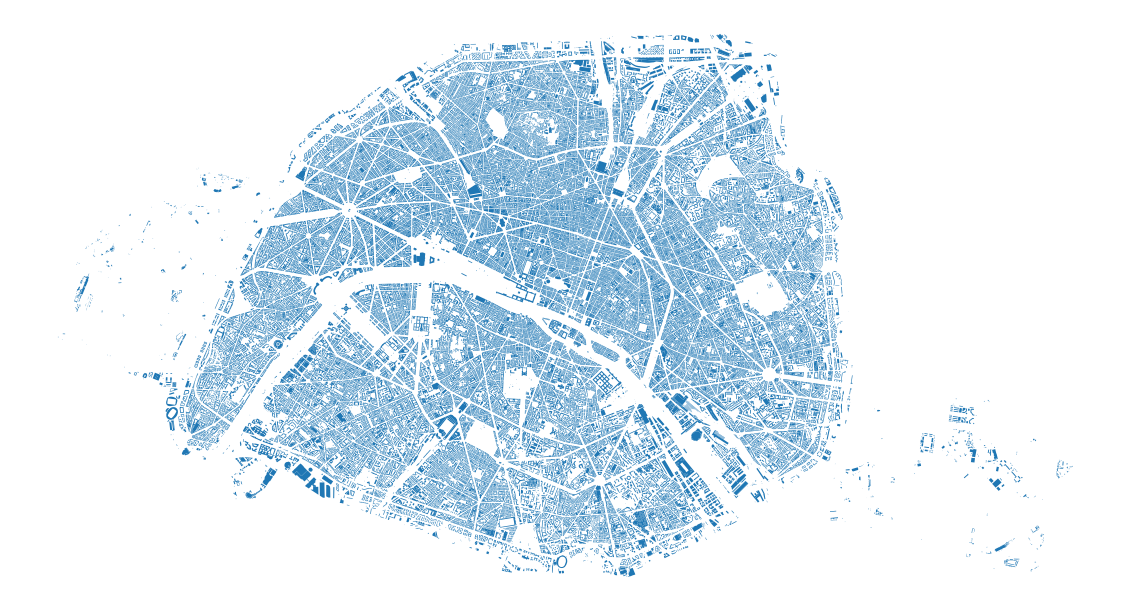

In [6]:
#checking the geodata
ax = gdf.plot(figsize = (20,20))
ax.set_axis_off()

# Plotting the pre-1974 building

In [7]:
drop_col = ['OBJECTID','n_sq_eb', 'b_igh', 'b_er', 'b_ee', 'an_const', 'an_rehab',
       'an_rehabf', 'b_dalle', 'b_horspu', 'h_moy', 'h_med',
       'h_min', 'h_max', 'm2_zinc', 'm2_tuile', 'm2_terrveg', 'm2_ardoise',
       'm2_beton', 'c_toitdom', 'n_sq_ar', 'n_sq_pc', 'n_sq_pu', 'c_ens_moy',
       'm2_e_in700', 'm2_e_70_80', 'm2_e_80_90', 'm2_e_90_10', 'm2_e_s1000',
       'm2_e_tot', 'c_source', 'c_morpho']
gdf_pre1974 = gdf.drop(columns=drop_col)

In [8]:
gdf_pre1974

,c_perconst,Shape_Leng,Shape_Area,geometry
0,5.0,90.417718,207.669519,"POLYGON ((647373.342 6860737.678, 647377.589 6..."
1,3.0,67.374241,204.870376,"POLYGON ((648109.676 6861039.929, 648113.813 6..."
2,3.0,58.528564,134.396968,"POLYGON ((650771.697 6858884.654, 650769.466 6..."
3,3.0,94.007567,360.347001,"POLYGON ((654395.541 6865867.198, 654388.184 6..."
4,6.0,104.103984,275.030131,"POLYGON ((655990.266 6861228.624, 655979.042 6..."
...,...,...,...,...
127956,12.0,49.430653,151.028660,"POLYGON ((655662.200 6859790.100, 655651.336 6..."
127957,12.0,38.618711,92.446095,"POLYGON ((655626.795 6859806.886, 655633.531 6..."
127958,12.0,37.977229,87.757573,"POLYGON ((655724.100 6859757.100, 655732.885 6..."
127959,12.0,120.840216,513.506548,"POLYGON ((655733.288 6859710.466, 655736.758 6..."


In [9]:
gdf_pre1974.to_crs('EPSG:3857', inplace = True)

In [10]:
gdf_pre1974['Pre_1974'] = gdf['c_perconst'] < 8

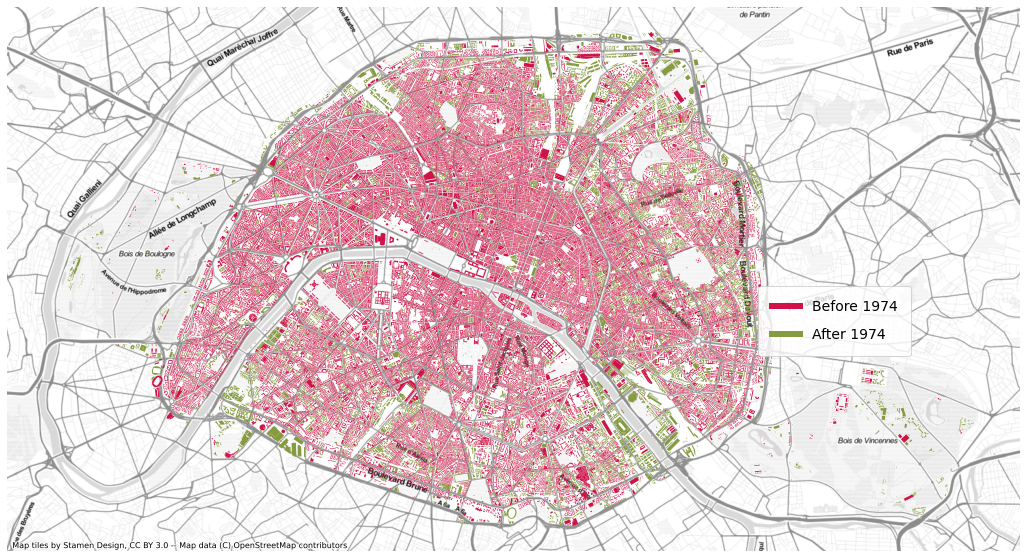

In [11]:
# Plot data
fig, ax = plt.subplots(figsize=(20,10 ))

pre1974_Palette = {'True': '#cf1248','False': '#869b40'}

#plot pre_1974 = TRUE
gdf_pre1974[gdf_pre1974['Pre_1974'] == True].plot(ax = ax, color = pre1974_Palette['True'])
#plot pre_1974 = FALSE
gdf_pre1974[gdf_pre1974['Pre_1974'] == False].plot(ax = ax, color = pre1974_Palette['False'])

#Final touches
ax.set_axis_off()
#add basemap
cx.add_basemap(ax, crs = gdf_pre1974.crs, source = cx.providers.Stamen.TonerLite)

#legend
from matplotlib.lines import Line2D
colour = list(pre1974_Palette.values())
lines = [Line2D([0], [0], color=c, linewidth=6, linestyle='-') for c in colour] #defining the handles
labels = ['Before 1974','After 1974' ] #define the labels
plt.legend(lines,labels,prop={'size': 14}, 
           #customise the legend box
           frameon=True, facecolor= '#FFFFFF', 
           bbox_to_anchor = (0.9,0.5),
           borderpad = 1,
           labelspacing = 1,
           mode = None,
          fontsize = 60)


plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/pre_1974.png',dpi = 300,transparent = True)

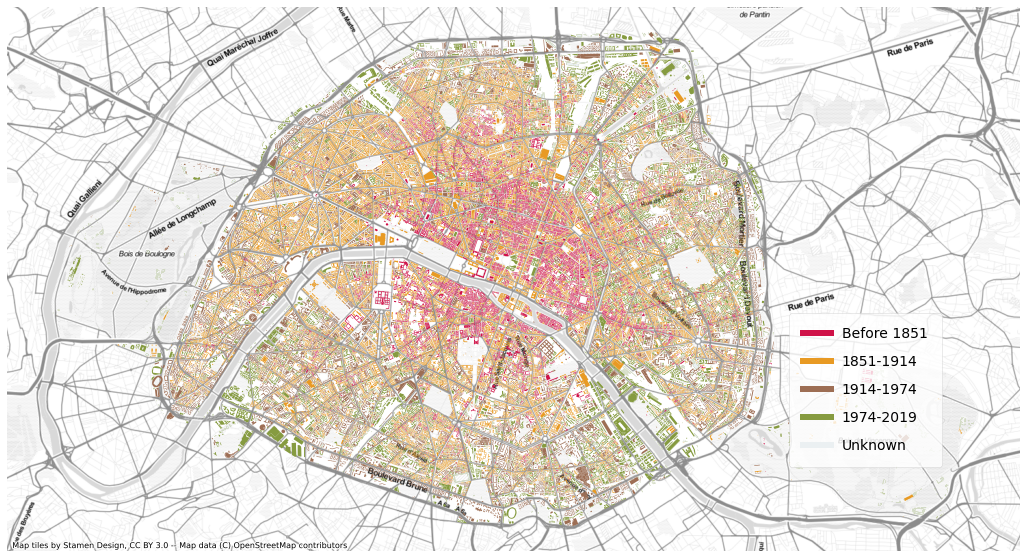

In [53]:
# Plot data
fig, ax = plt.subplots(figsize=(20,10 ))

pre1974_Palette = {'Before 1851': '#cf1248','1851-1914': '#E89A24','1914-1974': '#9D6E54','1974-2019': '#869b40','Unknown':'#EBF0F2'}

#plot pre_1974 = TRUE
gdf_pre1974[gdf_pre1974['c_perconst'] <3].plot(ax = ax, color = pre1974_Palette['Before 1851'])
#plot pre_1974 = FALSE
gdf_pre1974[gdf_pre1974['c_perconst']  == 3].plot(ax = ax, color = pre1974_Palette['1851-1914'])
#plot pre_1974 = FALSE
gdf_pre1974[(gdf_pre1974['c_perconst'] >3) & (gdf_pre1974['c_perconst']<8)].plot(ax = ax, color = pre1974_Palette['1914-1974'])
#plot pre_1974 = FALSE
gdf_pre1974[gdf_pre1974['c_perconst'] >= 8].plot(ax = ax, color = pre1974_Palette['1974-2019'])

gdf_pre1974[gdf_pre1974['c_perconst'] == 99].plot(ax = ax, color = pre1974_Palette['Unknown'])

#Final touches
ax.set_axis_off()
#add basemap
cx.add_basemap(ax, crs = gdf_pre1974.crs, source = cx.providers.Stamen.TonerLite)

#legend
from matplotlib.lines import Line2D
colour = list(pre1974_Palette.values())
lines = [Line2D([0], [0], color=c, linewidth=6, linestyle='-') for c in colour] #defining the handles
labels = pre1974_Palette.keys() #define the labels
plt.legend(lines,labels,prop={'size': 14}, 
           #customise the legend box
           frameon=True, facecolor= '#FFFFFF', 
           bbox_to_anchor = (0.93,0.45),
           borderpad = 1,
           labelspacing = 1,
           mode = None,
          fontsize = 60)



plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/building_age.png',dpi = 300,transparent = True, bbox_inches = 'tight')

In [12]:
!open '/Users/Tra_FIT/Desktop/python/URBS1003/pre_1974.png'

In [13]:
gdf_pre1974['area'] = gdf_pre1974['geometry'].area

In [14]:
gdf_pre1974.head()

,c_perconst,Shape_Leng,Shape_Area,geometry,Pre_1974,area
0,5.0,90.417718,207.669519,"POLYGON ((254132.954 6248523.270, 254139.431 6...",True,479.179498
1,3.0,67.374241,204.870376,"POLYGON ((255245.680 6248993.160, 255251.992 6...",True,472.769297
2,3.0,58.528564,134.396968,"POLYGON ((259311.281 6245750.355, 259307.939 6...",True,309.914547
3,3.0,94.007567,360.347001,"POLYGON ((264722.654 6256420.277, 264711.598 6...",True,832.953866
4,6.0,104.103984,275.030131,"POLYGON ((267197.126 6249379.427, 267180.120 6...",True,634.729783


In [15]:
area = gdf_pre1974.groupby('Pre_1974')['area'].sum()

In [16]:
area = pd.DataFrame(area)
area

,area
Pre_1974,
False,1.753835e+07
True,5.665405e+07


In [17]:
cop_perc_pre1974 = area.iloc[1,0]/(area.iloc[0,0] + area.iloc[1,0])
print(cop_perc_pre1974)

0.7636099099288357


# Pie Chart (MPG)

In [18]:
mpg_p_const_key = {"key":["Before 1800",
               "1800-1850",
              "1850-1914",
              "1915-1939",
              "1940-1975",
              "1975-2000",
               "After 2000"],
                   'value':[1,2,18,10,24,18,14]}

In [19]:
df = pd.DataFrame(mpg_p_const_key)

In [20]:
df.head()

,key,value
0,Before 1800,1
1,1800-1850,2
2,1850-1914,18
3,1915-1939,10
4,1940-1975,24


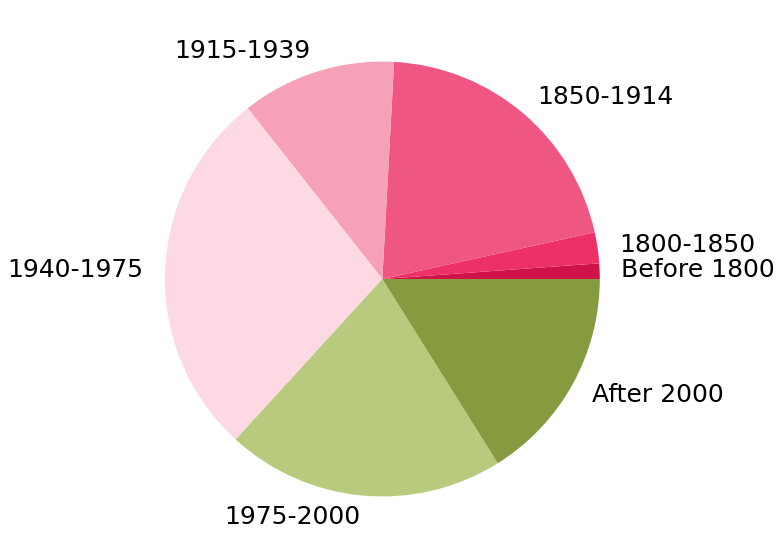

In [21]:
#define the plot style
plt.style.use('ggplot')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["figure.autolayout"] = False

colors = ['#CF1248','#ED3166','#F05682','#F7A1B9','#FCD9E3',
          '#B8CA7D','#869b40']

fig, ax = plt.subplots(figsize=(20,10 ))
ax = plt.pie(df['value'], labels = df['key'],colors = colors,textprops={'fontsize': 25})
plt.show()

fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/building_age.png',dpi = 300,transparent = True)

# Energy consumption by arrondissment

In [22]:
heat = [273280,237360,221660,220040,380920,
        427330,521060,848550,606750,516150,
        772440,977010,936270,736790,1600910,
        1569980,1125410,855460,889020,956610,14673000]
total = [729790,574200,488740,533690,835210,
         850380,1132540,1912930,1283600,1124020,
         1508590,2247000,2122510,1641630,3364700,
         3260010,2342860,1870220,1949920,1972040,31744580]

In [23]:
energy = {"heat":heat,'total':total}
energy = pd.DataFrame(energy)

In [24]:
energy.head()

,heat,total
0,273280,729790
1,237360,574200
2,221660,488740
3,220040,533690
4,380920,835210


In [25]:
energy['portion_heat'] = energy['heat'] / energy['total']

In [26]:
energy

,heat,total,portion_heat
0,273280,729790,0.374464
1,237360,574200,0.413375
2,221660,488740,0.453534
3,220040,533690,0.412299
4,380920,835210,0.456077
5,427330,850380,0.502517
6,521060,1132540,0.460081
7,848550,1912930,0.443587
8,606750,1283600,0.472694
9,516150,1124020,0.459200


In [34]:
gdf.groupby('c_perconst')['OBJECTID'].count()/gdf['OBJECTID'].count()

c_perconst
1.0     0.088066
2.0     0.139246
3.0     0.447519
5.0     0.080251
6.0     0.048140
7.0     0.034784
8.0     0.017161
9.0     0.017552
10.0    0.036456
11.0    0.017224
12.0    0.011144
99.0    0.062167
Name: OBJECTID, dtype: float64

In [28]:
gdf.describe()

,OBJECTID,n_sq_eb,an_const,an_rehab,an_rehabf,c_perconst,h_moy,h_med,h_min,h_max,...,c_ens_moy,m2_e_in700,m2_e_70_80,m2_e_80_90,m2_e_90_10,m2_e_s1000,m2_e_tot,c_morpho,Shape_Leng,Shape_Area
count,127961.000000,1.279610e+05,80161.000000,2429.000000,213.000000,127924.000000,127521.000000,127521.000000,127521.000000,127521.000000,...,126768.000000,126768.000000,126768.000000,126768.000000,126768.000000,126768.000000,126770.000000,127961.000000,127961.000000,127961.000000
mean,63981.000000,7.500647e+08,1900.619329,1992.966653,1997.408451,9.783113,15.737627,15.747304,10.551265,20.211080,...,650.276497,99.291422,26.042022,30.847801,38.123872,53.365266,247.707904,3.281969,70.728941,251.131112
std,36939.303235,3.737411e+04,64.858725,66.827917,11.139651,23.103038,7.508858,7.913597,6.867866,7.903988,...,208.366513,210.207718,63.769524,79.400434,113.481537,188.234893,563.579846,1.363118,68.810187,578.004833
min,1.000000,7.500000e+08,99.000000,65.000000,1950.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011340,0.000005
25%,31991.000000,7.500323e+08,1880.000000,1991.000000,1993.000000,3.000000,9.418750,9.000000,4.100000,15.100000,...,525.000000,30.000000,5.000000,4.000000,1.000000,0.000000,69.000000,2.000000,36.957215,68.921940
50%,63981.000000,7.500647e+08,1900.000000,1998.000000,1999.000000,3.000000,16.467523,16.700000,10.100000,21.100000,...,717.000000,57.000000,15.000000,17.000000,18.000000,19.000000,143.000000,4.000000,55.722373,143.735908
75%,95971.000000,7.500970e+08,1933.000000,2005.000000,2006.000000,5.000000,21.381412,21.700000,16.500000,24.500000,...,807.000000,106.000000,28.000000,35.000000,40.000000,60.000000,261.000000,4.000000,83.116855,263.274703
max,127961.000000,7.501307e+08,2021.000000,2020.000000,2017.000000,99.000000,284.786515,288.300000,223.600000,294.000000,...,1115.000000,22518.000000,6203.000000,8224.000000,9464.000000,18057.000000,46867.000000,7.000000,3621.909223,46856.921561
